In [250]:
import numpy as np

import itertools
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import os

# Vector Autoregressive Model

In [7]:
def var(X, pred_step):
    N, T = X.shape
    temp1 = np.zeros((N, N))
    temp2 = np.zeros((N, N))
    for t in range(1, T):
        temp1 += np.outer(X[:, t], X[:, t - 1])
        temp2 += np.outer(X[:, t - 1], X[:, t - 1])
    A = temp1 @ np.linalg.inv(temp2)
    mat = np.append(X, np.zeros((N, pred_step)), axis = 1)
    for s in range(pred_step):
        mat[:, T + s] = A @ mat[:, T + s - 1]
    return mat[:, - pred_step :]

In [37]:
X = np.zeros((2, 10))
X[0, :] = np.arange(1, 11, 1)
X[1, :] = np.arange(2, 12, 1)
pred_step = 2
mat_hat = var(X, pred_step)
print(mat_hat)

[[11. 12.]
 [12. 13.]]


In [6]:
X

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]])

# Matrix Autoregressive Model

In [3]:
def mar(X, pred_step, maxiter = 100):
    m, n, T = X.shape
    B = np.random.randn(n, n)
    for it in range(maxiter):
        temp0 = B.T @ B
        temp1 = np.zeros((m, m))
        temp2 = np.zeros((m, m))
        for t in range(1, T):
            temp1 += X[:, :, t] @ B @ X[:, :, t - 1].T
            temp2 += X[:, :, t - 1] @ temp0 @ X[:, :, t - 1].T
        A = temp1 @ np.linalg.inv(temp2)
        temp0 = A.T @ A
        temp1 = np.zeros((n, n))
        temp2 = np.zeros((n, n))
        for t in range(1, T):
            temp1 += X[:, :, t].T @ A @ X[:, :, t - 1]
            temp2 += X[:, :, t - 1].T @ temp0 @ X[:, :, t - 1]
        B = temp1 @ np.linalg.inv(temp2)
    tensor = np.append(X, np.zeros((m, n, pred_step)), axis = 2)
    for s in range(pred_step):
        tensor[:, :, T + s] = A @ tensor[:, :, T + s - 1] @ B.T
    return tensor[:, :, - pred_step :]

In [410]:
X

array([[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]],

       [[ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
        [ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]]])

In [413]:
X.shape

(2, 2, 10)

In [425]:
np.transpose(Xt, (1, 2, 0))

array([[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]],

       [[ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
        [ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]]])

In [423]:
Xt.shape

(10, 2, 2)

In [420]:
Xt

array([[[ 1.,  2.],
        [ 3.,  4.]],

       [[ 2.,  3.],
        [ 4.,  5.]],

       [[ 3.,  4.],
        [ 5.,  6.]],

       [[ 4.,  5.],
        [ 6.,  7.]],

       [[ 5.,  6.],
        [ 7.,  8.]],

       [[ 6.,  7.],
        [ 8.,  9.]],

       [[ 7.,  8.],
        [ 9., 10.]],

       [[ 8.,  9.],
        [10., 11.]],

       [[ 9., 10.],
        [11., 12.]],

       [[10., 11.],
        [12., 13.]]])

In [417]:
Xt=np.transpose(X, (2, 0, 1))

In [409]:
def reshape(X, m, n, T):
    # Reshape X from (T,m,n) to (m,n,T)
    return np.transpose(X, (1, 2, 0))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
[ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


In [408]:
X.reshape(10,2,2)

array([[[ 1.,  2.],
        [ 3.,  4.]],

       [[ 5.,  6.],
        [ 7.,  8.]],

       [[ 9., 10.],
        [ 2.,  3.]],

       [[ 4.,  5.],
        [ 6.,  7.]],

       [[ 8.,  9.],
        [10., 11.]],

       [[ 3.,  4.],
        [ 5.,  6.]],

       [[ 7.,  8.],
        [ 9., 10.]],

       [[11., 12.],
        [ 4.,  5.]],

       [[ 6.,  7.],
        [ 8.,  9.]],

       [[10., 11.],
        [12., 13.]]])

In [406]:
X = np.zeros((2, 2, 10))
X[0, 0, :] = np.arange(1, 11,1)
X[0, 1, :] = np.arange(2, 12,1)
X[1, 0, :] = np.arange(3, 13,1)
X[1, 1, :] = np.arange(4, 14,1)
pred_step = 2
tensor_hat = mar(X, pred_step)
print(tensor_hat[:, :, 0])
print(tensor_hat[:, :, 1])

[[11. 12.]
 [13. 14.]]
[[12. 13.]
 [14. 15.]]


# ToyNN

In [207]:
def get_params(model):
    return [val.cpu().detach().clone().numpy() for val in model.parameters()]

Define the Neural Network and its train/test function:

In [191]:
# Source: https://www.datacamp.com/tutorial/pytorch-tutorial-building-a-simple-neural-network-from-scratch
class ToyNN(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=10, output_dim=1):
        super(ToyNN, self).__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
        self.layer_2 = nn.Linear(hidden_dim, output_dim)
       
    def forward(self, x):
        x = torch.nn.functional.relu(self.layer_1(x))
        x = torch.nn.functional.sigmoid(self.layer_2(x))
        return x

def train_toy(model, dataloader, epochs, device):
    loss_fn = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
    loss_values = []
    params = []
    for epoch in range(epochs):
        params.append(get_params(model))
        for X, y in dataloader:
            # zero the parameter gradients
            optimizer.zero_grad()
        
            # forward + backward + optimize
            pred = model(X)
            loss = loss_fn(pred, y.unsqueeze(-1))
            loss_values.append(loss.item())
            loss.backward()
            optimizer.step()
    return loss_values, params

def test_toy(model, dataloader, device):
    y_pred = []
    y_test = []
    total = 0
    correct = 0
    with torch.no_grad():
        for X, y in dataloader:
            outputs = model(X)
            predicted = np.where(outputs < 0.5, 0, 1)
            predicted = list(itertools.chain(*predicted))
            y_pred.append(predicted)
            y_test.append(y)
            total += y.size(0)
            correct += (predicted == y.numpy()).sum().item()
    # loss, accuracy
    return 0, correct // total

Define the train/test datasets:

In [65]:
# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len
   
batch_size = 64

X, y = make_circles(n_samples = 10000,
                    noise= 0.05,
                    random_state=26)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=26)

# Instantiate training and test data
train_data = Data(X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

# Check it's working
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break

Batch: 1
X shape: torch.Size([64, 2])
y shape: torch.Size([64])


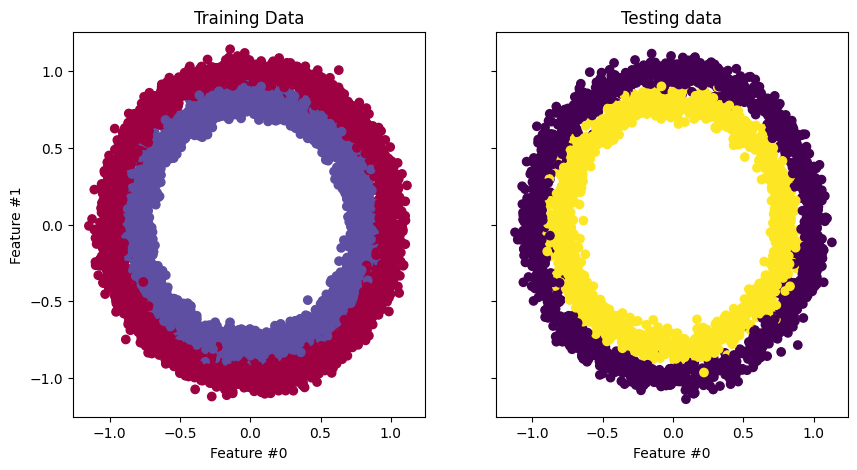

In [66]:
fig, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10, 5))
train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
train_ax.set_title("Training Data")
train_ax.set_xlabel("Feature #0")
train_ax.set_ylabel("Feature #1")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
test_ax.set_title("Testing data")
plt.show()

Train:

In [857]:
model = ToyNN()
loss_values, params = train_toy(model, train_dataloader, epochs=100, device="cpu")

/Users/eddie/.pyenv/versions/3.7.13/lib/python3.7/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


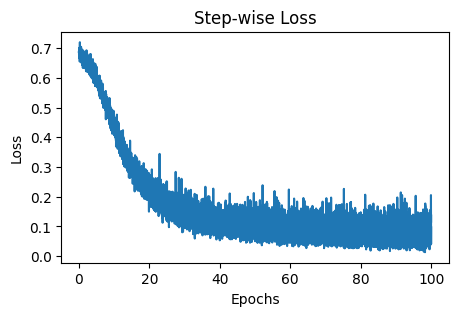

In [244]:
step = np.linspace(0, 100, 10500)
fig, ax = plt.subplots(figsize=(5,3))
plt.plot(step, np.array(loss_values))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [858]:
np.array(params).shape


/Users/eddie/.pyenv/versions/3.7.13/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(100, 4)

## Signature Matrices with MAR

**This approach does not seem to work. Probably the signature matrix computation is wrong or there's a bug somewhere.**

This first attempt tries to model the following solution:
1. At some point of the FL algorithm we get a tensor M = (m x n x T) where m := clients; n := parameters; T := time/round
2. For each m do: 
    - compute the signature matrices (n x n x T)
3. At the end of the for loop we have a tensor M_m for each m with the above shape
4. Now for each M_m, forecast M_r with shape (n x n) by passing to the algorithm the tensor M_m with shape (n x n x T-1), that is without the last round.
5. Compute the anomaly score:
    - M_hat = (n x n) is the sign. matrix of the real last round
    - M_r = (n x n) is the forecaster sign. matrix of the last round
    - error = (M_r - M_hat)^2 <-- matrix with shape (n x n)
    - the anomaly score is the sum of the values in error or the number of elements of error above a certain threshold

Get the parameters of layer1 and layer2 in order to plot them as a time series:

In [831]:
def flatten_params(params):
    params_flattened = []
    for i in range(len(params)):
        params_flattened.append([])
        for j in range(len(params[i])):
            if j == 0 or j == 2:
                p = np.hstack(params[i][j])
                for k in range(len(p)):
                    params_flattened[i].append(p[k])
    return params_flattened

In [856]:
len(params)

100

In [854]:
np.array(flatten_params(params)).shape

(100, 30)

So this is the input of our problem:

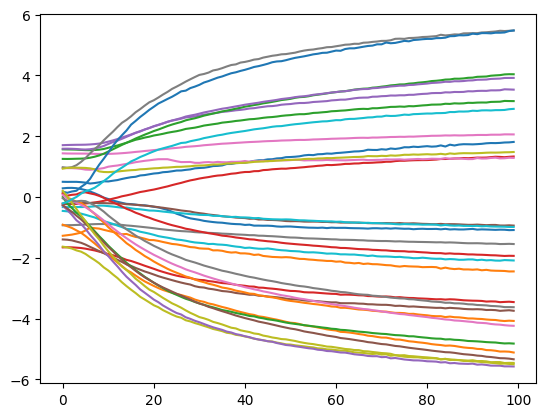

In [817]:
plt.plot(np.array(params_flattened))
plt.show()

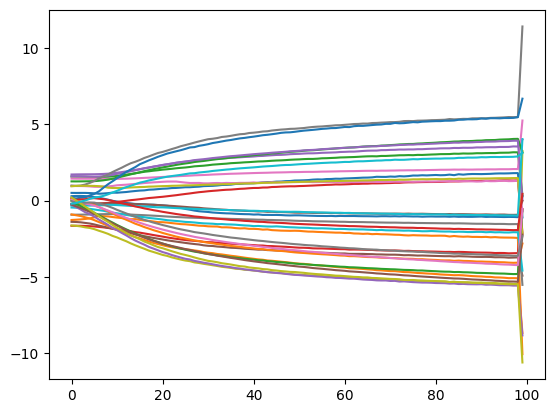

In [767]:
# Perturbate params_flattened
perturbate = lambda a: a + np.random.normal(loc=0, scale=3, size=len(a))
perturbated_params = params_flattened.copy()
perturbated_params[-1:] = np.apply_along_axis(perturbate, 0, params_flattened[-1:])
plt.plot(perturbated_params)
plt.show()

Transform the time series into signature matrices:

In [699]:
def generate_train_test_data(
    params_time_series="",
    matrix_data_path="/Users/eddie/Documents/Università/ComputerScience/Thesis/flwr-pytorch/test_notebook/matrix_data/",
    train_start=0,
    train_end=0,
    test_start=0,
    test_end=0,
    gap_time=1,
    step_max=5,
    win_size=[1]):

    # load params_time_series and transform it into a csv
    data = np.array(params_time_series).T

    sensor_n = data.shape[0]

    # min-max normalization
    max_value = np.max(data, axis=1)
    min_value = np.min(data, axis=1)
    data = (np.transpose(data) - min_value)/(max_value - min_value + 1e-6)
    print(data.shape)

    data = np.transpose(data)
    print(data.shape)

    # Check if the path exists, if not, create it:
    if not os.path.exists(matrix_data_path):
        os.makedirs(matrix_data_path)
    #else:
    #    shutil.rmtree(matrix_data_path)
    #    os.makedirs(matrix_data_path)

    #multi-scale signature matix generation
    for w in range(len(win_size)):
        matrix_all = []
        win = win_size[w]
        print ("generating signature with window " + str(win) + "...")
        for t in range(train_start, test_end, gap_time):
            matrix_t = np.zeros((sensor_n, sensor_n))
            if t >= 0:
                for i in range(sensor_n):
                    for j in range(i, sensor_n):
                        matrix_t[i][j] = np.inner(data[i, t - win:t], data[j, t - win:t])/(win) # rescale by win
                        matrix_t[j][i] = matrix_t[i][j]
            matrix_all.append(matrix_t)

        path_temp = matrix_data_path + "matrix_win_" + str(win)

        np.save(path_temp, matrix_all)
        del matrix_all[:]

    print("matrix_win generation finish!")

    #data sample generation
    print("generating train/test data samples...")

    value_colnames = ['total_count','error_count','error_rate']
    train_data_path = matrix_data_path + "train_data/"
    if not os.path.exists(train_data_path):
        os.makedirs(train_data_path)
    test_data_path = matrix_data_path + "test_data/"
    if not os.path.exists(test_data_path):
        os.makedirs(test_data_path)

    # Unify all signature matrices with window [10/30/60]
    data_all = []
    for value_col in value_colnames:
        for w in range(len(win_size)):
            path_temp = matrix_data_path + "matrix_win_" + str(win_size[w]) + ".npy"
            data_all.append(np.load(path_temp))

    train_test_time = [[train_start, train_end], [test_start, test_end]]
    #train_test_time = [[train_start, train_end], [test_start-test_start, test_end-test_start]]
    for i in range(len(train_test_time)):
        for data_id in range(int(train_test_time[i][0]/gap_time), int(train_test_time[i][1]/gap_time)):
            step_multi_matrix = []
            for step_id in range(step_max, 0, -1):
                multi_matrix = []
                for k in range(len(value_colnames)):
                    for j in range(len(win_size)):
                        multi_matrix.append(data_all[k*len(win_size) + j][data_id - step_id])
                step_multi_matrix.append(multi_matrix)

            # Discriminate train and test data:
            if data_id >= (train_start/gap_time + win_size[-1]/gap_time + step_max) and data_id < (train_end/gap_time): # remove start points with invalid value
                path_temp = os.path.join(train_data_path, 'train_data_' + str(data_id))
                np.save(path_temp, step_multi_matrix)
            elif data_id >= (test_start/gap_time) and data_id < (test_end/gap_time):
                path_temp = os.path.join(test_data_path, 'test_data_' + str(data_id))
                np.save(path_temp, step_multi_matrix)

            del step_multi_matrix[:]

    print ("train/test data generation finish!")

In [807]:
generate_train_test_data(params_time_series=params_flattened, train_start=0, train_end=99, test_start=99, test_end=100, gap_time=1, step_max=5, win_size=[1])

(100, 30)
(30, 100)
generating signature with window 1...
matrix_win generation finish!
generating train/test data samples...
train/test data generation finish!


In [808]:
M = np.load("/Users/eddie/Documents/Università/ComputerScience/Thesis/flwr-pytorch/test_notebook/matrix_data/matrix_win_5.npy")

In [809]:
M.shape

(100, 30, 30)

In [810]:
# First 5 elements are 0s and last 10 are for testing
M = M[5:-1]
Mt = M[-1:]

Transform matrix M into the shape needed for MAR (30,30,100):

In [811]:
def reshape(X):
    # Reshape X from (T,m,n) to (m,n,T)
    return np.transpose(X, (1, 2, 0))

In [812]:
Mr = reshape(M)

In [813]:
pred_step = 10
tensor_hat = mar(Mr, pred_step)
print(tensor_hat.shape)

(30, 30, 10)


In [814]:
M.shape

(94, 30, 30)

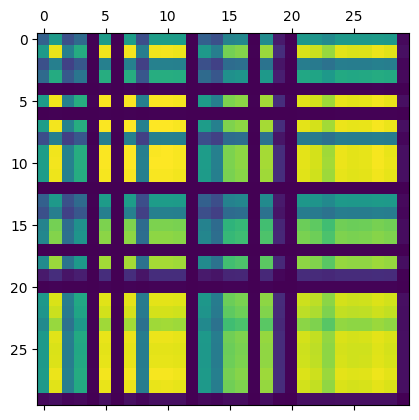

In [815]:
plt.matshow(M[0])

Number of broken sensors:  0


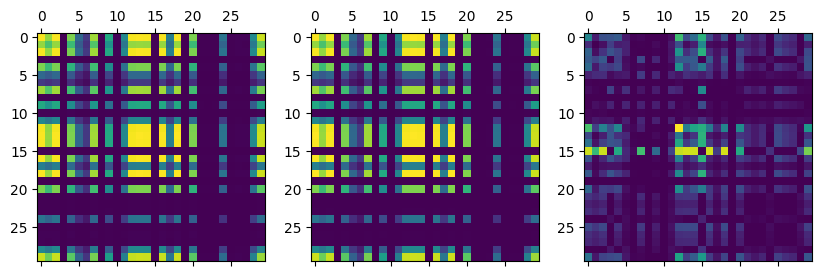

In [816]:
i = 0
threshold = 0.02

select_matrix_error = np.square(np.subtract(Mt[i], tensor_hat[:,:,i]))
num_broken = len(select_matrix_error[select_matrix_error > threshold])

print("Number of broken sensors: ", num_broken)

fig, ax = plt.subplots(1,3, figsize=(10,5))
ax[0].matshow(Mt[i])
ax[1].matshow(tensor_hat[:,:,i])
ax[2].matshow(select_matrix_error)

## Timeseries with MAR

This first attempt tries to model the following solution:
1. At some point of the FL algorithm we get a tensor M = (m x n x T) where m := clients; n := parameters; T := time/round
2. Divide M s.t. M_hat is the matrix (m x n) of the last step and M is the tensor (m x n x T)
3. Forecast the last round matrix by passing M to the algorithm
4. Compute the anomaly score:
    - M_hat = (m x n) is the matrix of the real last round
    - M_r = (m x n) is the forecaster matrix of the last round
    - error = (M_r - M_hat)^2 <-- matrix with shape (m x n)
    - the anomaly score is the sum of the values in error or the number of elements of error above a certain threshold

In [818]:
# load all time series in order to have a tensor with shape (T,m,n)
def load_time_series(dir=""):
    files = os.listdir(dir)
    files.sort()
    data = []
    for file in files:
        data.append(np.load(os.path.join(dir, file), allow_pickle=True))
    return np.array(data)

In [823]:
tensor = load_time_series(dir="/Users/eddie/Documents/Università/ComputerScience/Thesis/flwr-pytorch/main/clients_params")

In [928]:
tensor.shape

(10, 100, 4)

In [872]:
M = np.zeros((10,100,30))

for i in range(len(tensor)):
    M[i] = flatten_params(tensor[i])

Transpose M in order to be used as a MAR:

In [874]:
M = np.transpose(M, (0, 2, 1))
print(M.shape)

(10, 30, 100)


In [879]:
M_hat = M[:,:,-1].copy()

In [900]:
M_hat.shape

(10, 30)

Perturbate client 0, 3 and 5:

In [901]:
clients = [0,3,5]

perturbate = lambda a: a + np.random.normal(loc=0, scale=3, size=len(a))
M_p = M_hat.copy()

for i in clients:
    M_p[i] = perturbate(M_p[i])

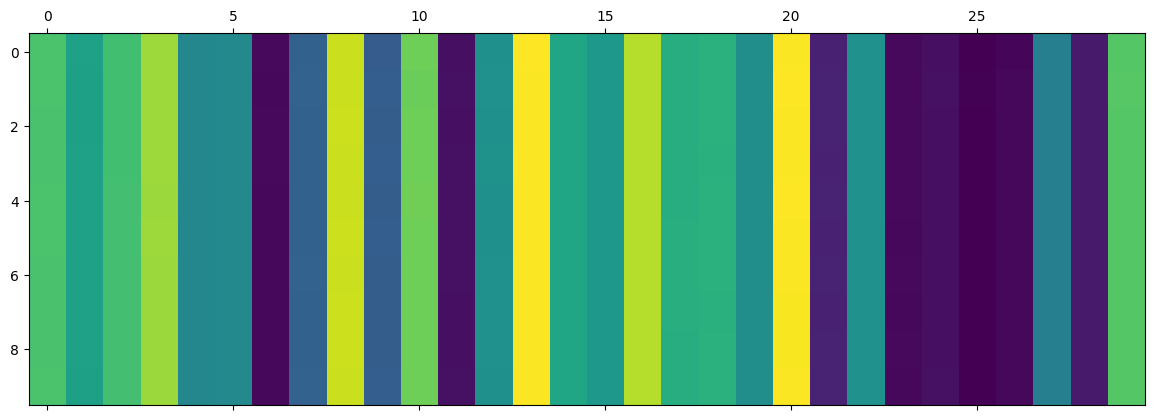

In [905]:
plt.matshow(M_hat)

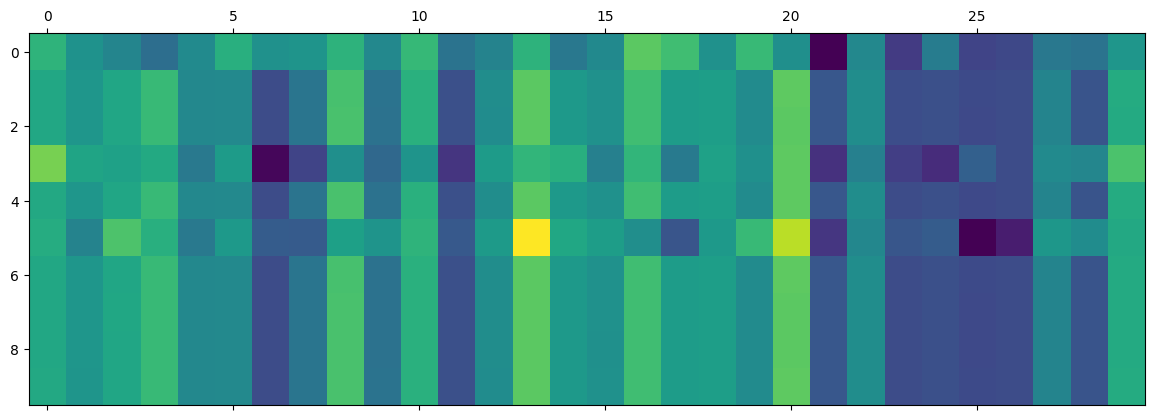

In [904]:
plt.matshow(M_p)

In [918]:
pred_step = 1
Mr = mar(M[:,:,:-1], pred_step)
print(Mr.shape)

(10, 30, 1)


Compute the anomaly score by using the normal M_hat:

Anomaly score:  1


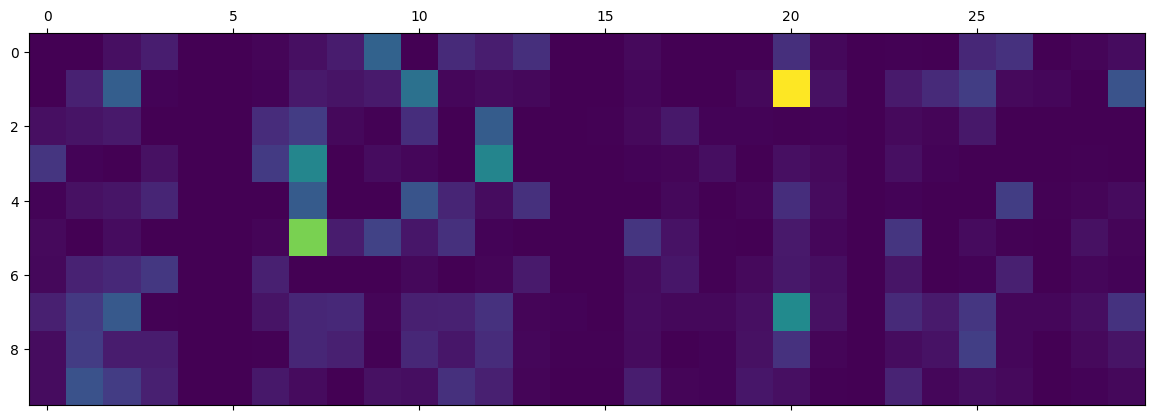

In [926]:
threshold = 0.005

select_matrix_error = np.square(np.subtract(M_hat, Mr[:,:,0]))
num_broken = len(select_matrix_error[select_matrix_error > threshold])
print("Anomaly score: ", num_broken)
plt.matshow(select_matrix_error)

Compute the anomaly score by using the perturbated last step M_p:

Anomaly score:  90


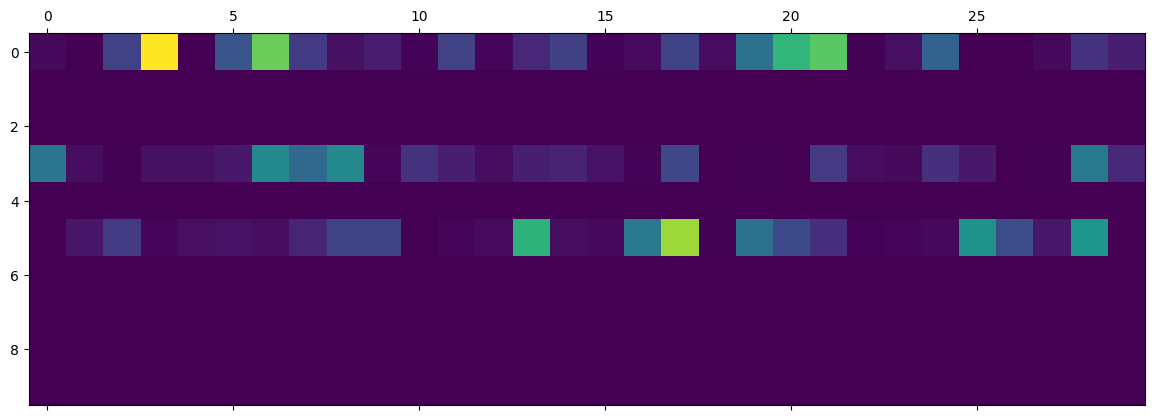

In [927]:
select_matrix_error = np.square(np.subtract(M_p, Mr[:,:,0]))
num_broken = len(select_matrix_error[select_matrix_error > threshold])
print("Anomaly score: ", num_broken)
plt.matshow(select_matrix_error)

Anomaly score is way bigger than before and it is clear from the image that clients 0, 3 and 5 are malicious.

## Experiments

In [935]:
M2 = load_time_series(dir="/Users/eddie/Documents/Università/ComputerScience/Thesis/flwr-pytorch/main/clients_params")

In [936]:
M2.shape

(10, 2, 4)

In [937]:
M2 = np.transpose(M2, (0, 2, 1))
M2.shape

(10, 4, 2)